# Aman Dhanotiya
## TASK-3: 'Exploratory Data Analysis- Retail'
### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

### Create dataframe

In [2]:
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# drop unnecessory columns from dataframe
df=df.drop("Postal Code", axis=1)

In [5]:
#  Checking no. of entry which have Negatve profit
df2=df[df['Profit']>0]
df3=df[df['Profit']<=0]
# df3
x1=df2.shape[0]
x2=df3.shape[0]
print(f"No. of entries which have positive profit= {x1}")
print(f"No. of entries which have positive Negative= {x2}")

No. of entries which have positive profit= 8058
No. of entries which have positive Negative= 1936


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# find duplicates and remove them.
df.duplicated().sum()

50

In [9]:
# drop the duplicate value
df=df.drop_duplicates()

In [10]:
# Here we can see total sell total overall profit in dataset.
total_sell=df['Sales'].sum()
profit=df2['Profit'].sum()
loss=df3['Profit'].sum()
Net_profit = profit+loss
print(f"total_sell {total_sell}") ,profit,loss,Net_profit
print(f"profit {profit}")
print(f"loss {loss}")

print(f"profitl {Net_profit}")


total_sell 2294599.3773
profit 442528.3074
loss -156131.28569999998
profitl 286397.02170000004


## Analysis (univariate) 

Text(0.5, 1.0, 'count of Segment use in dataset')

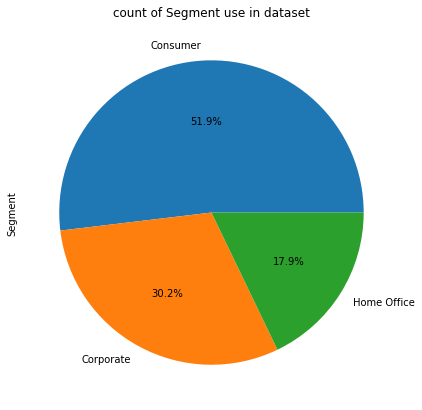

In [11]:
df['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=[15,7])
plt.title('count of Segment use in dataset')

### More than 50% order from consumer 

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64


Text(0.5, 1.0, 'Category count')

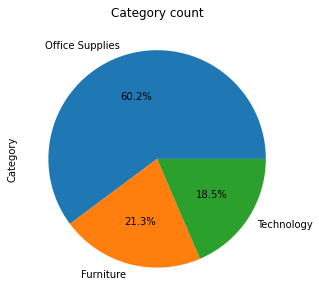

In [12]:
df['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=[15,5])
print(df['Category'].value_counts())
plt.title('Category count')
# plt.figure(figsize=(200, 50))

### we can see that more than 50% order from office supplies 

In [13]:
df['Country'].value_counts()

United States    9944
Name: Country, dtype: int64

Text(0.5, 1.0, 'Region wise Sales')

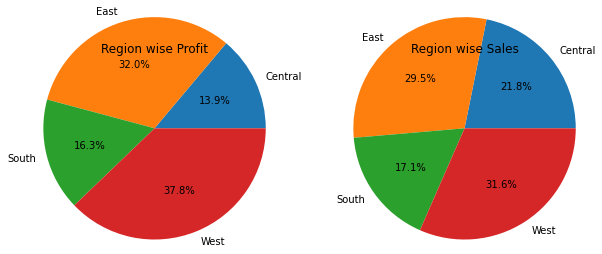

In [14]:
fig, (ax0,ax1) =plt.subplots(1,2,figsize=[10,5])
fig.tight_layout(pad=10.0)

# tt=df.groupby('Region')['Profit'].sum()
ax0.pie(df.groupby('Region')['Profit'].sum(),labels=['Central','East','South','West'],autopct='%1.1f%%', radius=2)
ax1.pie(df.groupby('Region')['Sales'].sum(),labels=['Central','East','South','West'],autopct='%1.1f%%', radius=2)
plt.show
ax0.set_title('Region wise Profit')
ax1.set_title('Region wise Sales')

### In both sales and profit West region is on top

Text(0.5, 1.0, 'Category wise Sales')

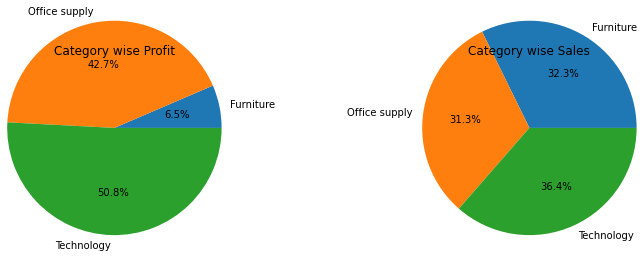

In [15]:
fig, (ax0,ax1) =plt.subplots(1,2,figsize=[15,10])
fig.tight_layout(pad=25.0)

# tt=df.groupby('Region')['Profit'].sum()
ax0.pie(df.groupby('Category')['Profit'].sum(),labels=['Furniture','Office supply','Technology'],autopct='%1.1f%%', radius=2)
ax1.pie(df.groupby('Category')['Sales'].sum(),labels=['Furniture','Office supply','Technology'],autopct='%1.1f%%', radius=2)
plt.show
ax0.set_title('Category wise Profit')
ax1.set_title('Category wise Sales')

### Category wise office supplies on top in both profit and sales 

In [16]:
df['City'].value_counts().head(8)

New York City    906
Los Angeles      734
Philadelphia     531
San Francisco    503
Seattle          424
Houston          373
Chicago          312
Columbus         221
Name: City, dtype: int64

###  Maximum order from New york city


<AxesSubplot:>

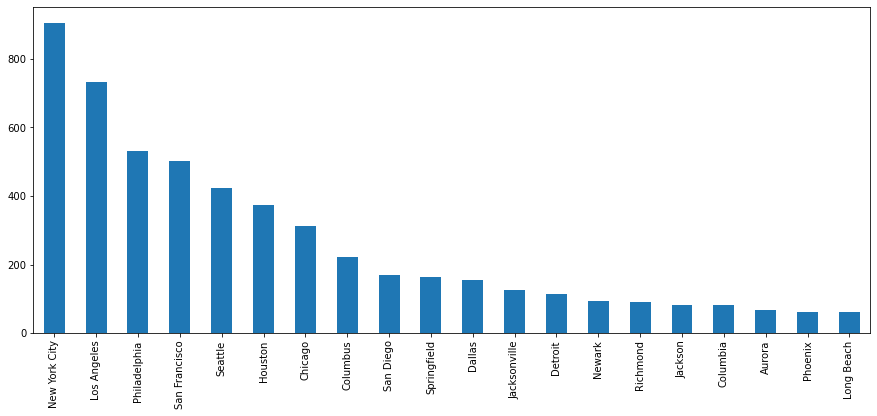

In [16]:
df['City'].value_counts().head(20).plot(kind='bar',figsize=[15,6])

<Figure size 14400x3600 with 0 Axes>

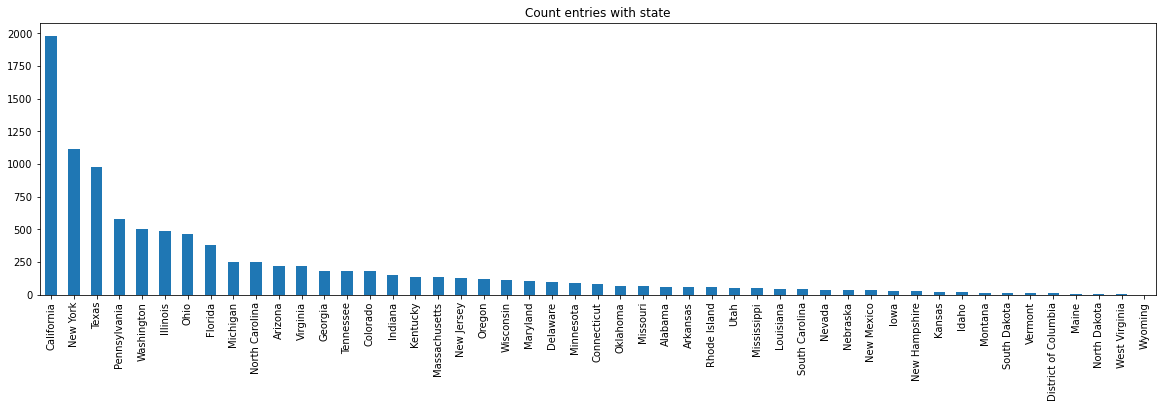

<Figure size 14400x3600 with 0 Axes>

In [17]:
df['State'].value_counts().plot(kind='bar',figsize=(20,5))
plt.title('Count entries with state')
plt.figure(figsize=(200, 50))

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64


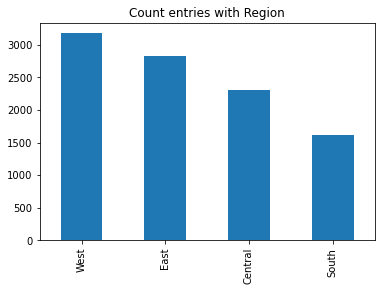

<Figure size 14400x3600 with 0 Axes>

In [18]:
df['Region'].value_counts().plot(kind='bar')
plt.title('Count entries with Region')
plt.figure(figsize=(200, 50))
print(df['Region'].value_counts().head())

Text(0.5, 1.0, 'State vs Profit')

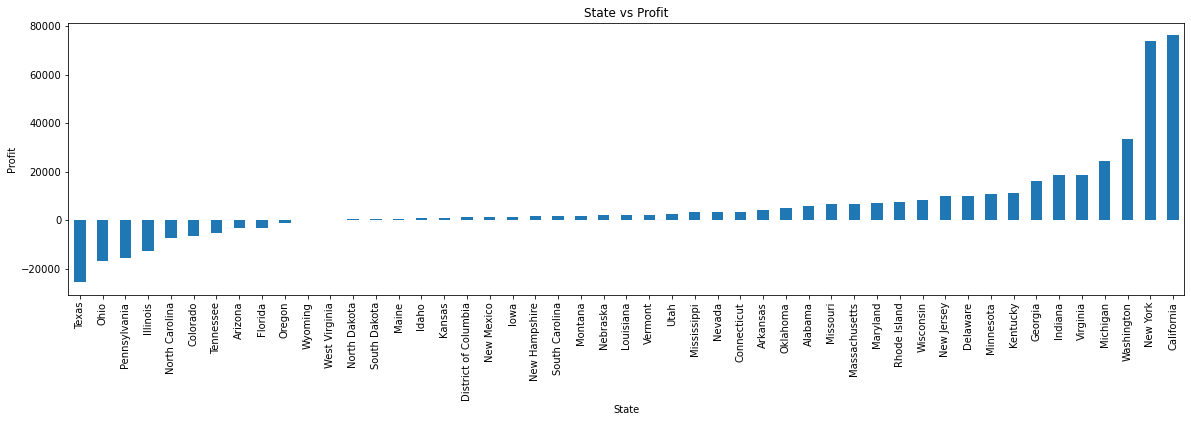

In [19]:
df.groupby(by ='State')['Profit'].sum().sort_values(ascending = True).plot(kind = 'bar',figsize=[20,5])
plt.ylabel('Profit')
plt.title('State vs Profit')

### Here we can see that in many state Profit is Negative or we can say that this states are in loss

In [20]:
df['Sub-Category'].value_counts()

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### Distribution of Sub-category 

Text(0.5, 1.0, 'Category count')

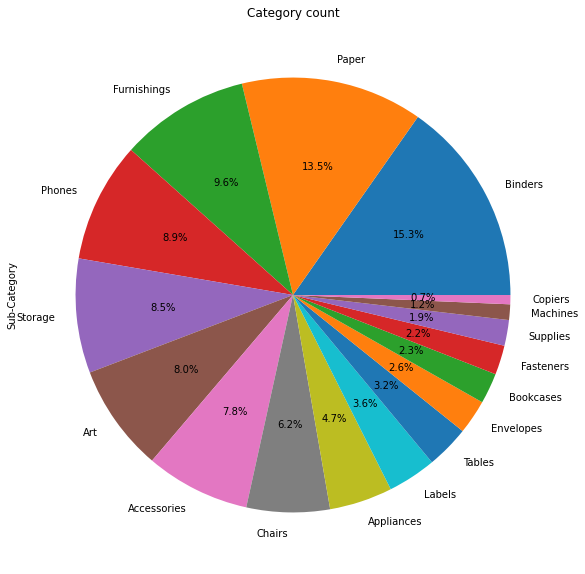

In [19]:
df['Sub-Category'].value_counts().plot(kind='pie', figsize=[10,10],autopct='%1.1f%%')
plt.title('Category count')


### Group by category and Sub-category and plot between No. of Quantity and groups  

Text(0, 0.5, 'Quantity')

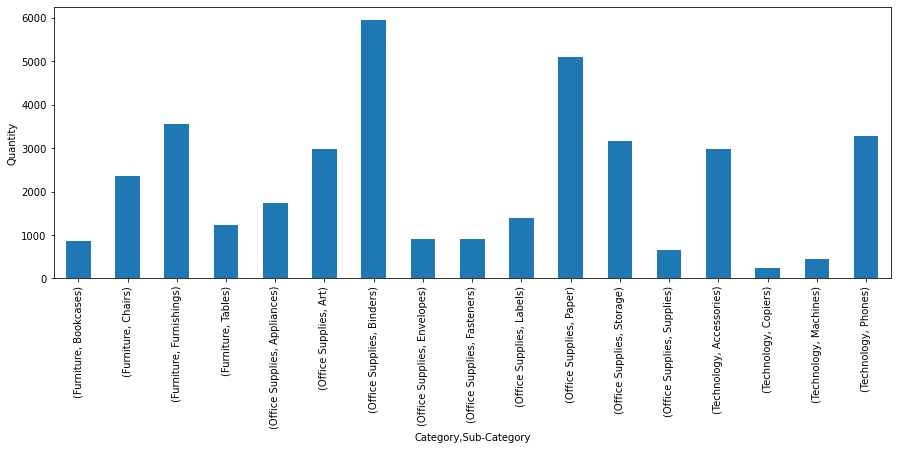

In [22]:
tf=df.groupby(['Category','Sub-Category']).Quantity.sum()
tf.plot(kind='bar', figsize=[15,5])
plt.ylabel('Quantity')
# tf.head()

Text(0.5, 1.0, 'Office Supplies Subcategory vs Quantity Count ')

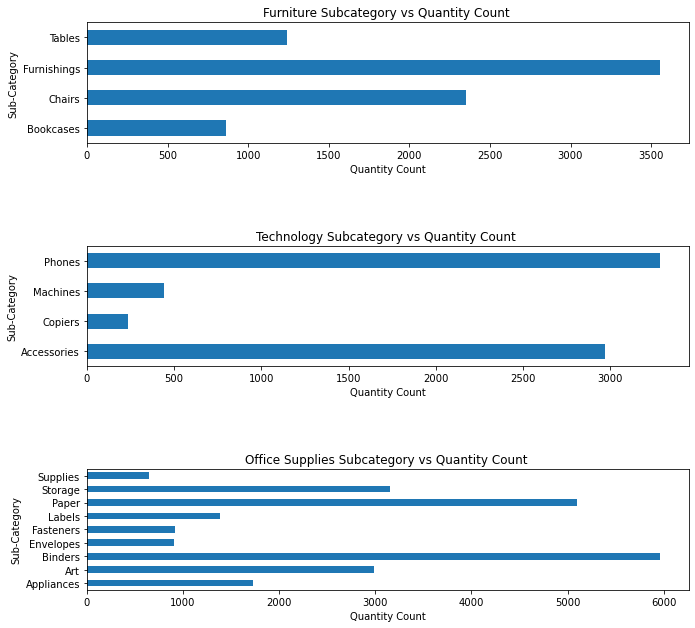

In [23]:
fig=plt.figure()
ax0=fig.add_subplot(3,1,1)
ax1=fig.add_subplot(3,1,2)
ax2=fig.add_subplot(3,1,3)
fig.tight_layout(pad=2.0)

tf['Furniture'].plot(kind='barh',ax=ax0,figsize=[10,10])
tf['Technology'].plot(kind='barh',ax=ax1,figsize=[10,10])
tf['Office Supplies'].plot(kind='barh',ax=ax2,figsize=[10,10])
ax0.set_xlabel('Quantity Count')
ax1.set_xlabel('Quantity Count')
ax2.set_xlabel('Quantity Count')

ax0.set_title('Furniture Subcategory vs Quantity Count ')
ax1.set_title('Technology Subcategory vs Quantity Count ')
ax2.set_title('Office Supplies Subcategory vs Quantity Count ')



In [24]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


<AxesSubplot:>

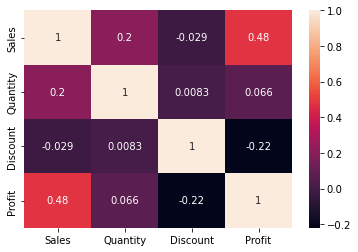

In [25]:
sea.heatmap(df.corr(),annot=True)

### from heat map we can see the realtion between columns

In [26]:
tf=df.groupby('Segment')[['Profit','Sales']].sum()
tf

,Profit,Sales
Segment,,
Consumer,133939.5218,1.159418e+06
Corporate,91911.1606,7.059702e+05
Home Office,60246.8755,4.292117e+05


## Analysis (Bivariate) 

### Profit and sales count Segment wise 

Text(0.5, 1.0, 'Profit and sale vs Segment')

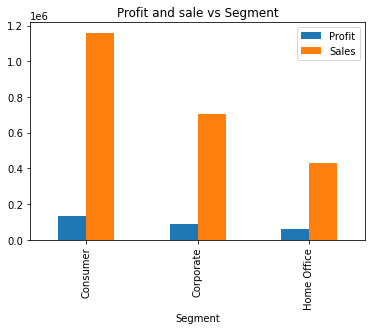

In [27]:

tf.plot(kind='bar')
plt.title('Profit and sale vs Segment')

In [28]:
tr=df.groupby(['Region','Category'])[['Profit','Sales']].sum()
tr

Profit        Sales
Region  Category                                
Central Furniture        -2906.1467  163407.1938
        Office Supplies   8870.7621  166900.7650
        Technology       33697.4320  170416.3120
East    Furniture         3091.7510  207631.6840
        Office Supplies  40917.8145  205279.0190
        Technology       47461.5254  264933.2050
South   Furniture         6771.2061  117298.6840
        Office Supplies  19986.3928  125651.3130
        Technology       19991.8314  148771.9080
West    Furniture        11528.1355  252231.1045
        Office Supplies  52421.1032  220424.9730
        Technology       44265.7506  251653.2160

### Profit and sales count Region and Category wise 

Text(0.5, 1.0, 'Region and Category wise Profit and sale')

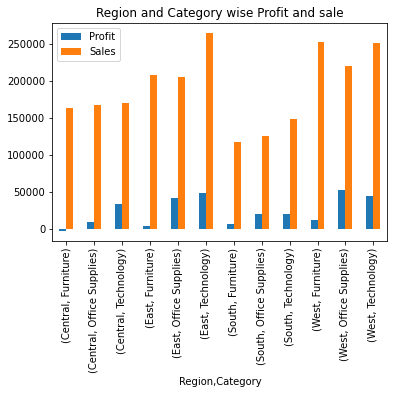

In [29]:
tr.plot(kind='bar')
plt.title('Region and Category wise Profit and sale')

### Quantity and Discount plot with Category 

                              Quantity  Discount
Category        Sub-Category                    
Furniture       Bookcases          863     47.79
                Chairs            2351    104.70
                Furnishings       3555    132.40
                Tables            1241     83.35
Office Supplies Appliances        1729     77.60
                Art               2986     59.60
                Binders           5961    564.80
                Envelopes          906     20.40
                Fasteners          914     17.80
                Labels            1387     24.80
                Paper             5100    100.80
                Storage           3156     63.00
                Supplies           647     14.60
Technology      Accessories       2972     60.60
                Copiers            234     11.00
                Machines           440     35.20
                Phones            3286    137.20


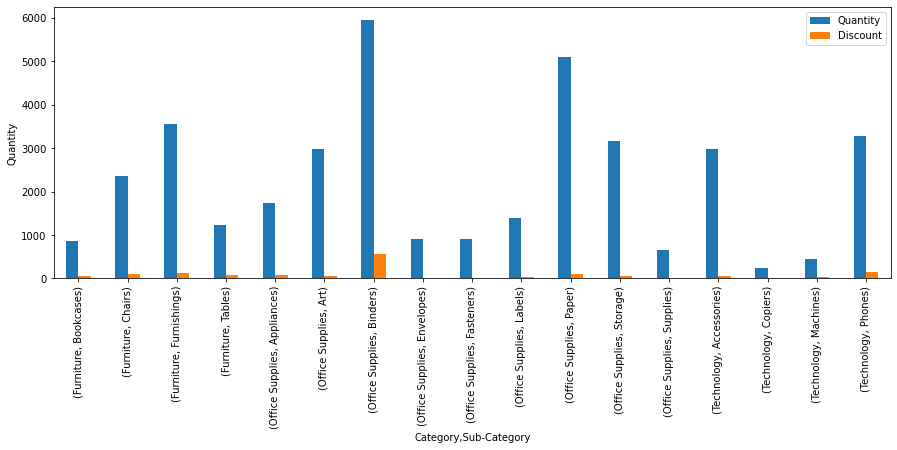

In [30]:
tf=df.groupby(['Category','Sub-Category'])[['Quantity','Discount']].sum()
print(tf)
tf.plot(kind='bar', figsize=[15,5])
plt.ylabel('Quantity')
plt.show()
# tf.head()

In [32]:
df.groupby('Category').sum()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,740568.6663,8010,368.24,18484.9459
Office Supplies,718256.0700,22786,943.40,122196.0726
Technology,835774.6410,6932,244.00,145416.5394


### Profit and sales count Category wise 

C:\Users\AMAN DHANOTIYA\AppData\Local\Temp\ipykernel_18920\1416445494.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Profit','Sales'].sum().plot.bar()


<AxesSubplot:xlabel='Category'>

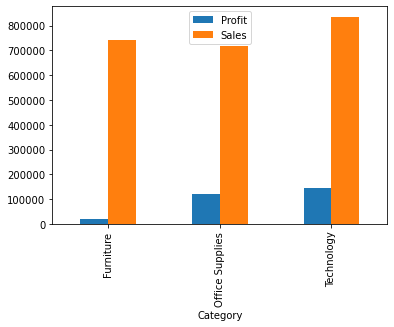

In [34]:
df.groupby('Category')['Profit','Sales'].sum().plot.bar()

In [35]:
dff=df.groupby('Sub-Category').sum()
dff.sort_values('Profit', ascending=False)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Copiers,149528.0300,234,11.00,55617.8249
Phones,329704.6780,3286,137.20,44493.0524
Accessories,167303.3020,2972,60.60,41920.9052
Paper,77960.8940,5100,100.80,33830.0381
Binders,203328.8590,5961,564.80,30205.2603
Chairs,327777.7610,2351,104.70,26567.1278
Storage,223808.4400,3156,63.00,21287.1788
Appliances,107532.1610,1729,77.60,18138.0054
Furnishings,91658.4440,3555,132.40,13042.0534


### Plotting bar graph between Sales, profit, Discount and Quantity and Sub category

Text(0, 0.5, 'Sum')

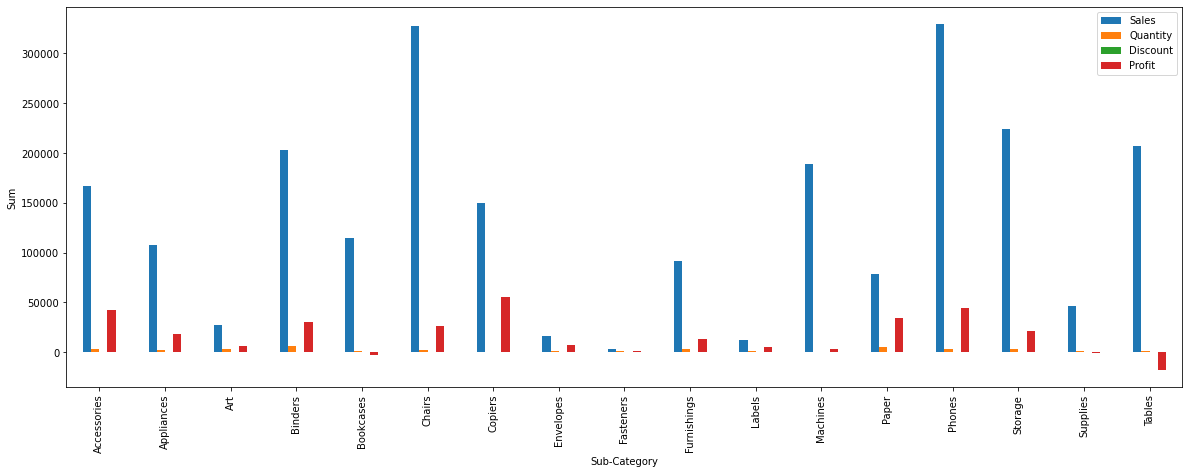

In [36]:
dff.plot(kind='bar', figsize=[20,7])
plt.ylabel('Sum')

Text(0, 0.5, 'profit')

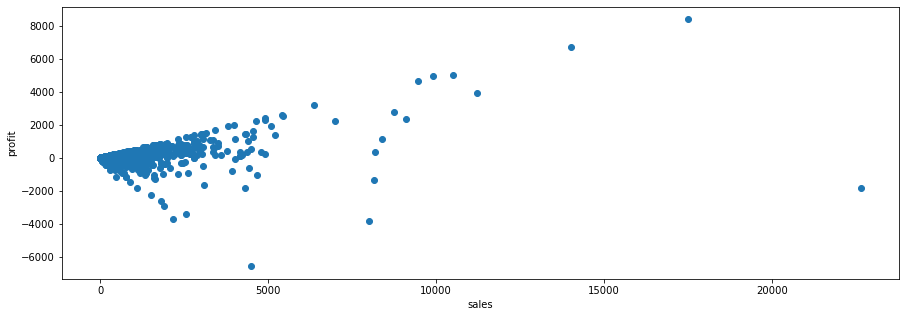

In [37]:
x=df['Sales']
y=df['Profit']

f=plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.scatter(x,y)

plt.xlabel('sales')
plt.ylabel('profit')

## Result 

1. From heatmap we can see the inter-relation between different columns.
2. Profit gain is maximum in Technology items
3. Sales - Technology > furniture > office suply
4. sub category count maximum in Binders
5.Maximum profit in Copier
6.Maximum loss in Tables.
7. Standard class is most preffered shipping mode
8.West region order is maximum

